In [28]:
import pandas as pd

In [20]:
pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.2.0-cp38-none-win_amd64.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ndjson

  Using cached ndjson-0.3.1-py2.py3-none-any.whl (5.3 kB)
Note: you may need to restart the kernel to use updated packages.


In [21]:
import ndjson
import matplotlib.pyplot as plt

In [9]:
with open(r'C:\Users\rajjr\PycharmProjects\growth_hacking\chapter_1\video_games_5.json') as f:
    data = ndjson.load(f)
    
df = pd.json_normalize(data)
print(df.head())

   overall  verified   reviewTime      reviewerID        asin  \
0      5.0      True  10 17, 2015  A1HP7NVNPFMA4N  0700026657   
1      4.0     False  07 27, 2015  A1JGAP0185YJI6  0700026657   
2      3.0      True  02 23, 2015  A1YJWEXHQBWK2B  0700026657   
3      2.0      True  02 20, 2015  A2204E1TH211HT  0700026657   
4      5.0      True  12 25, 2014  A2RF5B5H74JLPE  0700026657   

        reviewerName                                         reviewText  \
0        Ambrosia075  This game is a bit hard to get the hang of, bu...   
1             travis  I played it a while but it was alright. The st...   
2  Vincent G. Mezera                                           ok game.   
3         Grandma KR  found the game a bit too complicated, not what...   
4                jon  great game, I love it and have played it since...   

                                       summary  unixReviewTime vote  ...  \
0                  but when you do it's great.      1445040000  NaN  ...   
1  But

In [22]:
shuffled_df = df.sample(frac=1, random_state=42)
shuffled_df = shuffled_df[['overall', 'reviewText']]
shuffled_df.rename(columns={'overall': 'rating', 'reviewText': 'review'}, inplace=True)
print(shuffled_df.head())

        rating                                             review
364850     5.0  Love this 3ds game. I made a zombie Togepi wit...
216628     5.0                                           Fun game
319038     5.0  This game is so fun.  I think it is the best S...
440696     5.0  I hated the first game but absolutely love thi...
287513     5.0   Love the Tales games. Glad I purchased this one.


In [23]:
df_100k = shuffled_df.sample(n=100000, random_state=42)
print(df_100k.shape)
print(df_100k.head())

(100000, 2)
        rating                                             review
165709     5.0  Very fast shipping!\nThis is a fun game and de...
89114      2.0  After having rented this title, I am very glad...
464991     4.0                           still got it. RAINDROPS!
149596     5.0  I didn't expect Starcraft 2: Wings of Liberty ...
365197     1.0                                            BORING!


In [24]:
df_100k.to_csv(r'C:\Users\rajjr\PycharmProjects\growth_hacking\chapter_1\100k.csv', index=False)

In [25]:
df_5 = shuffled_df.loc[shuffled_df['rating'] == 5.0].sample(n=1500, random_state=42)
df_4 = shuffled_df.loc[shuffled_df['rating'] == 4.0].sample(n=500, random_state=42)
df_3 = shuffled_df.loc[shuffled_df['rating'] == 3.0].sample(n=500, random_state=42)
df_2 = shuffled_df.loc[shuffled_df['rating'] == 2.0].sample(n=500, random_state=42)
df_1 = shuffled_df.loc[shuffled_df['rating'] == 1.0].sample(n=1500, random_state=42)

df_combined = pd.concat([df_5, df_4, df_3, df_2, df_1])


In [26]:
df_combined.to_csv('balanced.csv', index=False)

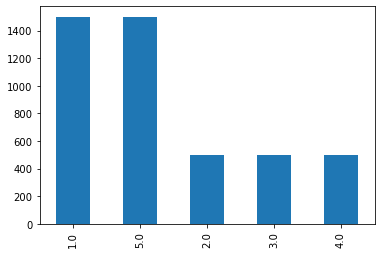

In [27]:
df_combined['rating'].value_counts(sort=True).plot.bar()
plt.show()